# Tutorial

max   z = x + 2y
s.t.  2x + y    <= 20 
      -4x + 5y  <= 10 
      -x + 2y   => -2
      -x + 5y   = 15
      x         >= 0
      y         >= 0 

# Scipy Tutorial

In [71]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

# Objective function: Minimize -z = -x - 2y
obj = [-1, -2]

# Inequality constraints
lhs_ineq = [[ 2,   1],
            [-4,   5],
            [ 1,  -2]]
rhs_ineq = [20, 
            10, 
             2] 

# Equality constraints
lhs_eq = [[-1, 5]] 
rhs_eq = [15]

# Bounds 
bnd = [(0, float("inf")), # Bounds of x
       (0, float("inf"))] # Bounds of y

# Optimize problem
opt = linprog(c=obj, 
              A_ub=lhs_ineq, b_ub=rhs_ineq,
              # A_eq=lhs_eq,   b_eq=rhs_eq,
              bounds=bnd,
              method="revised simplex")

opt


/tmp/ipykernel_6573/3567985443.py:25: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=obj,


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -20.714285714285715
       x: [ 6.429e+00  7.143e+00]
     nit: 2

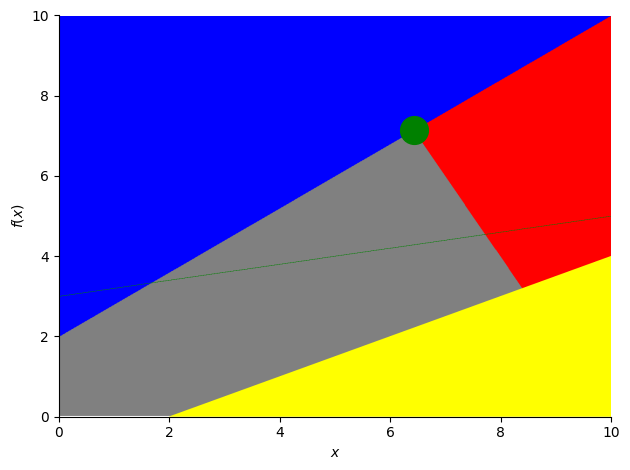

In [72]:
from sympy import symbols, Eq, plot, plot_implicit, And

x, y = symbols('x y')
p1 = plot(show=False, xlim=(0,10), ylim=(0,10), markers=[{'args': [opt.x[0], opt.x[1], 'go'], 'ms': 20}])

p1.extend(plot_implicit(And(x > 0, y > 0), (x,0,10), (y,0,10), show=False, line_color='gray'))

p1.extend(plot_implicit(2*x + y >= 20, (x,0,10), (y,0,10), show=False, line_color='red'))
p1.extend(plot_implicit(-4*x + 5*y >= 10, (x,0,10), (y,0,10), show=False, line_color='blue'))
p1.extend(plot_implicit(-x + 2*y <= -2, (x,0,10), (y,0,10), show=False, line_color='yellow'))

p1.extend(plot_implicit(Eq(-x + 5*y, 15), (x,0,10), (y,0,10), show=False, line_color='green'))

p1.show()

# PuLP Tutorial

In [83]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

# Create the model
model = LpProblem(name="small-problem", sense = LpMaximize)

# Initialize the decision variables
x = LpVariable(name="x", lowBound=0)
y = LpVariable(name="y", lowBound=0)

# Add the constraints to the model
model += (2 * x + y <= 20, "red_constraint")
model += (4 * x - 5 * y >= -10, "blue_constraint")
model += (-x + 2 * y >= -2, "yellow_constraint")
model += (-x + 5 * y == 15, "green_constraint")

# Add objective function to model
obj_func = x + 2 * y
model += obj_func

model

small-problem:
MAXIMIZE
1*x + 2*y + 0
SUBJECT TO
red_constraint: 2 x + y <= 20

blue_constraint: 4 x - 5 y >= -10

yellow_constraint: - x + 2 y >= -2

green_constraint: - x + 5 y = 15

VARIABLES
x Continuous
y Continuous

In [84]:
# Solve the problem
status = model.solve()

print(f"status: {model.status}, {LpStatus[model.status]}")
print(f"objective: {model.objective.value()}")

for var in model.variables():
  print(f"{var.name}: {var.value()}")

# Values
for name, constraint in model.constraints.items():
  print(f"{name}: {constraint.value()}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/john/.local/lib/python3.8/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/87a3ddc81d7f4a8f8bc7c86d85b45be3-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/87a3ddc81d7f4a8f8bc7c86d85b45be3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 20 RHS
At line 25 BOUNDS
At line 26 ENDATA
Problem MODEL has 4 rows, 2 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-4) rows, 0 (-2) columns and 0 (-8) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 16.818182
After Postsolve, objective 16.818182, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 16.81818182 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):